# Question 6.2a: 
Implement a program that automatically creates a set of if-then clauses
from the training table of a binary dataset of your choice. Implement
different strategies to minimize the number of if-then clauses. Document
your strategies, the number of resulting conditional clauses, and the accuracy
achieved.

For question 6.2a, I used the ```breast_cancer_wisconsin_data.csv``` dataset. The first step was to clean the dataset. Then, split into a training and testing set. Then train a decision tree classifier. Then, I wrote a ```tree_to_code``` recursive function which retrieves the if-then statements from the training table of the ```breast_cancer_wisconsin_data.csv``` dataset. After getting the if-then statements, I checked the accuracy. Then, I used different pruning techniques to minimize the number of if-then clauses. Note that some of the pruning techniques were most useful at reducing the number of if-then clauses than others. Even after reducing the number of if-then clauses, the accuracy was almost the same.

In [103]:
file_path = 'breast_cancer_wisconsin_data.csv'
breast_cancer_data_loaded = pd.read_csv(file_path)

In [39]:
breast_cancer_data_loaded.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
breast_cancer_data_loaded.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [43]:
breast_cancer_data_loaded['diagnosis'] = breast_cancer_data_loaded['diagnosis'].map({'M': 1, 'B': 0})

In [44]:
X_check = breast_cancer_data_loaded.drop('diagnosis', axis=1)
y_check = breast_cancer_data_loaded['diagnosis']

In [45]:
X_train_check, X_test_check, y_train_check, y_test_check = train_test_split(X_check, y_check, test_size=0.2, random_state=42)

In [46]:
dt_classifier_check = DecisionTreeClassifier(max_depth=3, random_state=42)

In [47]:
dt_classifier_check.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [49]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    """
    Outputs a decision tree model as if-then statements.
    """
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            result = tree_.value[node][0]
            # Decision based on the majority of samples in the leaf
            classification = "Malignant" if result.argmax() == 1 else "Benign"
            print(f"{indent}then predict '{classification}'")

    recurse(0, 0)


In [50]:
tree_to_code(dt_classifier_check, X_check.columns)

if concave points_mean <= 0.05:
  if radius_worst <= 16.83:
    if area_se <= 48.70:
      then predict 'Benign'
    else:  # if area_se > 48.70
      then predict 'Malignant'
  else:  # if radius_worst > 16.83
    if texture_mean <= 16.19:
      then predict 'Benign'
    else:  # if texture_mean > 16.19
      then predict 'Malignant'
else:  # if concave points_mean > 0.05
  if concave points_worst <= 0.15:
    if perimeter_worst <= 115.25:
      then predict 'Benign'
    else:  # if perimeter_worst > 115.25
      then predict 'Malignant'
  else:  # if concave points_worst > 0.15
    if fractal_dimension_se <= 0.01:
      then predict 'Malignant'
    else:  # if fractal_dimension_se > 0.01
      then predict 'Benign'


In [68]:
from sklearn.metrics import accuracy_score

y_pred_check = dt_classifier_check.predict(X_test_check)

accuracy_check = accuracy_score(y_test_check, y_pred_check)

print(f"Accuracy: {accuracy_check:.11f}")


Accuracy: 0.94736842105


The above accuracy (without using any pruning techniques) is 0.94736842105. This is the original accuracy.

### Now, reducing the number of if then clauses using different pruning techniques. Note that some pruning techniques worked better than others.

The first pruning method is maximum depth. This method significantly reduced the number of if-then clauses. Now the accuracy is 0.9298245614 which is close to the above, original accuracy of 0.94736842105.

In [56]:
dt_classifier_simplified = DecisionTreeClassifier(max_depth=2, random_state=42)

In [57]:
dt_classifier_simplified.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [58]:
tree_to_code(dt_classifier_simplified, X_check.columns)

if concave points_mean <= 0.05:
  if radius_worst <= 16.83:
    then predict 'Benign'
  else:  # if radius_worst > 16.83
    then predict 'Malignant'
else:  # if concave points_mean > 0.05
  if concave points_worst <= 0.15:
    then predict 'Benign'
  else:  # if concave points_worst > 0.15
    then predict 'Malignant'


In [66]:
y_pred_simplified = dt_classifier_simplified.predict(X_test_check)

accuracy_simplified = accuracy_score(y_test_check, y_pred_simplified)

print(f"Accuracy of the simplified model: {accuracy_simplified:.10f}")


Accuracy of the simplified model: 0.9298245614


The second pruning method is maximum leaf nodes. This method was as not as successful in reducing the number of if-then clasuses as the maximum depth pruning method above. The accuracy using maximum leaf nodes of 0.9385964912 is close to the original accuracy of 0.94736842105.

In [70]:
dt_classifier_max_leaf = DecisionTreeClassifier(max_depth=3, random_state=42, max_leaf_nodes=8)

In [71]:
dt_classifier_max_leaf.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, random_state=42)

In [72]:
tree_to_code(dt_classifier_max_leaf, X_check.columns)

if concave points_mean <= 0.05:
  if radius_worst <= 16.83:
    if radius_se <= 0.63:
      then predict 'Benign'
    else:  # if radius_se > 0.63
      then predict 'Malignant'
  else:  # if radius_worst > 16.83
    if texture_worst <= 19.91:
      then predict 'Benign'
    else:  # if texture_worst > 19.91
      then predict 'Malignant'
else:  # if concave points_mean > 0.05
  if concave points_worst <= 0.15:
    if perimeter_worst <= 115.25:
      then predict 'Benign'
    else:  # if perimeter_worst > 115.25
      then predict 'Malignant'
  else:  # if concave points_worst > 0.15
    if concavity_se <= 0.14:
      then predict 'Malignant'
    else:  # if concavity_se > 0.14
      then predict 'Benign'


In [74]:
y_pred_max_leaf = dt_classifier_max_leaf.predict(X_test_check)

accuracy_max_leaf = accuracy_score(y_test_check, y_pred_max_leaf)

print(f"Accuracy of the max_leaf_nodes pruned model: {accuracy_max_leaf:.10f}")

Accuracy of the max_leaf_nodes pruned model: 0.9385964912


The third pruning method is minimum samples split nodes. This method was as not as successful in reducing the number of if-then clasuses as the maximum depth pruning method above. The accuracy using maximum leaf nodes of 0.9298245614 is close to the original accuracy of 0.94736842105.

In [75]:
dt_classifier_min_samples_split = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_split=40)

In [76]:
dt_classifier_min_samples_split.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, min_samples_split=40, random_state=42)

In [77]:
tree_to_code(dt_classifier_min_samples_split, X_check.columns)

if concave points_mean <= 0.05:
  if radius_worst <= 16.83:
    if area_se <= 48.70:
      then predict 'Benign'
    else:  # if area_se > 48.70
      then predict 'Malignant'
  else:  # if radius_worst > 16.83
    then predict 'Malignant'
else:  # if concave points_mean > 0.05
  if concave points_worst <= 0.15:
    then predict 'Benign'
  else:  # if concave points_worst > 0.15
    if concavity_se <= 0.14:
      then predict 'Malignant'
    else:  # if concavity_se > 0.14
      then predict 'Benign'


In [79]:
y_pred_min_samples_split = dt_classifier_min_samples_split.predict(X_test_check)

accuracy_min_samples_split = accuracy_score(y_test_check, y_pred_min_samples_split)

print(f"Accuracy of the min_samples_split pruned model: {accuracy_min_samples_split:.10f}")

Accuracy of the min_samples_split pruned model: 0.9298245614


# Question 6.2b:

Use the algorithms developed in (a) on different datasets. Again, observe
how your choices make a difference.

For question 6.2b, I used the ```banana_quality_data.csv``` dataset and ```bank.csv```.

### With ```banana_quality_data.csv``` dataset.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
file_path = 'banana_quality_data.csv'
banana_quality_data_loaded = pd.read_csv(file_path)

In [5]:
banana_quality_data_loaded.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [6]:
X_check = banana_quality_data_loaded.drop('Quality', axis=1)
y_check = banana_quality_data_loaded['Quality']

In [7]:
X_train_check, X_test_check, y_train_check, y_test_check = train_test_split(X_check, y_check, test_size=0.2, random_state=42)


In [8]:
dt_classifier_check_banana = DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
dt_classifier_check_banana.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [10]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    """
    Outputs a decision tree model as if-then statements.
    """
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            result = tree_.value[node][0]
            # Decision based on the majority of samples in the leaf
            classification = "Bad" if result.argmax() == 1 else "Good"
            print(f"{indent}then predict '{classification}'")

    recurse(0, 0)


In [11]:
tree_to_code(dt_classifier_check_banana, X_check.columns)

if Sweetness <= 0.61:
  if HarvestTime <= 0.58:
    if Ripeness <= 0.74:
      then predict 'Good'
    else:  # if Ripeness > 0.74
      then predict 'Good'
  else:  # if HarvestTime > 0.58
    if Ripeness <= -1.93:
      then predict 'Good'
    else:  # if Ripeness > -1.93
      then predict 'Bad'
else:  # if Sweetness > 0.61
  if Softness <= 1.19:
    if Weight <= -0.56:
      then predict 'Bad'
    else:  # if Weight > -0.56
      then predict 'Bad'
  else:  # if Softness > 1.19
    if Size <= -1.62:
      then predict 'Good'
    else:  # if Size > -1.62
      then predict 'Bad'


In [12]:
y_pred_check = dt_classifier_check_banana.predict(X_test_check)

accuracy_check = accuracy_score(y_test_check, y_pred_check)

print(f"Accuracy: {accuracy_check:.11f}")

Accuracy: 0.81062500000


The above accuracy (without using any pruning techniques) is 0.81062500000. This is the original accuracy.

The first pruning technique used was maximum depth. This was very successful in decreasing the number of if-then clauses. The accuracy was 0.7868750000 which is close to the original accuracy of 0.81062500000.

In [15]:
dt_classifier_banana_simplified = DecisionTreeClassifier(max_depth=2, random_state=42)

In [16]:
dt_classifier_banana_simplified.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [17]:
# Generate "if-then" clauses for the newly trained model
tree_to_code(dt_classifier_banana_simplified, X_check.columns)

if Sweetness <= 0.61:
  if HarvestTime <= 0.58:
    then predict 'Good'
  else:  # if HarvestTime > 0.58
    then predict 'Bad'
else:  # if Sweetness > 0.61
  if Softness <= 1.19:
    then predict 'Bad'
  else:  # if Softness > 1.19
    then predict 'Bad'


In [18]:
y_pred_simplified = dt_classifier_banana_simplified.predict(X_test_check)

accuracy_simplified = accuracy_score(y_test_check, y_pred_simplified)

print(f"Accuracy of the simplified model: {accuracy_simplified:.10f}")

Accuracy of the simplified model: 0.7868750000


The second pruning technique used was maximum leaf nodes. This was not successful in decreasing the number of if-then clauses. The accuracy was 0.81062500000 which is the same as the original accuracy of 0.81062500000.   

In [23]:
dt_classifier_banana_max_leaf = DecisionTreeClassifier(max_depth=3, random_state=42, max_leaf_nodes=8)

In [24]:
dt_classifier_banana_max_leaf.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, random_state=42)

In [25]:
tree_to_code(dt_classifier_banana_max_leaf, X_check.columns)

if Sweetness <= 0.61:
  if HarvestTime <= 0.58:
    if Ripeness <= 0.74:
      then predict 'Good'
    else:  # if Ripeness > 0.74
      then predict 'Good'
  else:  # if HarvestTime > 0.58
    if Ripeness <= -1.93:
      then predict 'Good'
    else:  # if Ripeness > -1.93
      then predict 'Bad'
else:  # if Sweetness > 0.61
  if Softness <= 1.19:
    if Weight <= -0.56:
      then predict 'Bad'
    else:  # if Weight > -0.56
      then predict 'Bad'
  else:  # if Softness > 1.19
    if Size <= -1.62:
      then predict 'Good'
    else:  # if Size > -1.62
      then predict 'Bad'


In [26]:
y_pred_max_leaf = dt_classifier_banana_max_leaf.predict(X_test_check)

accuracy_max_leaf = accuracy_score(y_test_check, y_pred_max_leaf)

print(f"Accuracy of the max_leaf_nodes pruned model: {accuracy_max_leaf:.10f}")

Accuracy of the max_leaf_nodes pruned model: 0.8106250000


The third pruning technique used was minimum samples split. This was not successful in decreasing the number of if-then clauses. The accuracy was 0.8106250000 which is the same as the original accuracy of 0.8106250000.

In [27]:
dt_classifier_banana_min_samples_split = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_split=40)

In [28]:
dt_classifier_banana_min_samples_split.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, min_samples_split=40, random_state=42)

In [29]:
tree_to_code(dt_classifier_banana_min_samples_split, X_check.columns)

if Sweetness <= 0.61:
  if HarvestTime <= 0.58:
    if Ripeness <= 0.74:
      then predict 'Good'
    else:  # if Ripeness > 0.74
      then predict 'Good'
  else:  # if HarvestTime > 0.58
    if Ripeness <= -1.93:
      then predict 'Good'
    else:  # if Ripeness > -1.93
      then predict 'Bad'
else:  # if Sweetness > 0.61
  if Softness <= 1.19:
    if Weight <= -0.56:
      then predict 'Bad'
    else:  # if Weight > -0.56
      then predict 'Bad'
  else:  # if Softness > 1.19
    if Size <= -1.62:
      then predict 'Good'
    else:  # if Size > -1.62
      then predict 'Bad'


In [30]:
y_pred_min_samples_split = dt_classifier_banana_min_samples_split.predict(X_test_check)

accuracy_min_samples_split = accuracy_score(y_test_check, y_pred_min_samples_split)

print(f"Accuracy of the min_samples_split pruned model: {accuracy_min_samples_split:.10f}")

Accuracy of the min_samples_split pruned model: 0.8106250000


### With ```bank.csv``` dataset.

In [36]:
file_path = 'bank.csv'
bank_loaded = pd.read_csv(file_path)

In [37]:
bank_loaded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [39]:
for col in bank_loaded.columns:
    if bank_loaded[col].dtype == 'object':
        bank_loaded[col] = bank_loaded[col].astype('category')

In [40]:
bank_loaded = pd.get_dummies(bank_loaded, drop_first=True)

In [41]:
X_check = bank_loaded.drop('poutcome_success', axis=1)
y_check = bank_loaded['poutcome_success']

In [42]:
X_train_check, X_test_check, y_train_check, y_test_check = train_test_split(X_check, y_check, test_size=0.2, 
                                                                            random_state=42)

In [43]:
dt_bank = DecisionTreeClassifier(max_depth=3, random_state=42)

In [44]:
dt_bank.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [45]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    """
    Outputs a decision tree model as if-then statements.
    """
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            result = tree_.value[node][0]
            classification = "Approve" if result.argmax() == 1 else "Not Approve"
            print(f"{indent}then predict '{classification}'")

    recurse(0, 0)

In [46]:
tree_to_code(dt_bank, X_check.columns)

if poutcome_unknown <= 0.50:
  if deposit_yes <= 0.50:
    if pdays <= 122.50:
      then predict 'Not Approve'
    else:  # if pdays > 122.50
      then predict 'Not Approve'
  else:  # if deposit_yes > 0.50
    if poutcome_other <= 0.50:
      then predict 'Approve'
    else:  # if poutcome_other > 0.50
      then predict 'Not Approve'
else:  # if poutcome_unknown > 0.50
  then predict 'Not Approve'


In [47]:
y_pred_check = dt_bank.predict(X_test_check)

accuracy_check = accuracy_score(y_test_check, y_pred_check)

print(f"Accuracy: {accuracy_check:.11f}")

Accuracy: 0.93864755934


The above accuracy (without using any pruning techniques) is 0.93864755934. This is the original accuracy.

The first pruning technique used was maximum depth. This was very successful in decreasing the number of if-then clauses. The accuracy was 0.9055082848 which is close to the original accuracy of 0.9386475593.

In [48]:
dt_bank = DecisionTreeClassifier(max_depth=2, random_state=42)

In [49]:
dt_bank.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [50]:
tree_to_code(dt_bank, X_check.columns)

if poutcome_unknown <= 0.50:
  if deposit_yes <= 0.50:
    then predict 'Not Approve'
  else:  # if deposit_yes > 0.50
    then predict 'Approve'
else:  # if poutcome_unknown > 0.50
  then predict 'Not Approve'


In [51]:
y_pred_simplified = dt_bank.predict(X_test_check)

accuracy_simplified = accuracy_score(y_test_check, y_pred_simplified)

print(f"Accuracy of the simplified model: {accuracy_simplified:.10f}")

Accuracy of the simplified model: 0.9055082848


The second pruning technique used was maximum leaf nodes. This was not successful in decreasing the number of if-then clauses. The accuracy was 0.9386475593 which is the original accuracy of 0.9386475593. 

In [55]:
dt_classifier_bank_max_leaf = DecisionTreeClassifier(max_depth=3, random_state=42, max_leaf_nodes=8)

In [56]:
dt_classifier_bank_max_leaf.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, random_state=42)

In [57]:
tree_to_code(dt_classifier_bank_max_leaf, X_check.columns)

if poutcome_unknown <= 0.50:
  if deposit_yes <= 0.50:
    if pdays <= 122.50:
      then predict 'Not Approve'
    else:  # if pdays > 122.50
      then predict 'Not Approve'
  else:  # if deposit_yes > 0.50
    if poutcome_other <= 0.50:
      then predict 'Approve'
    else:  # if poutcome_other > 0.50
      then predict 'Not Approve'
else:  # if poutcome_unknown > 0.50
  then predict 'Not Approve'


In [58]:
y_pred_max_leaf = dt_classifier_bank_max_leaf.predict(X_test_check)

accuracy_max_leaf = accuracy_score(y_test_check, y_pred_max_leaf)

print(f"Accuracy of the max_leaf_nodes pruned model: {accuracy_max_leaf:.10f}")

Accuracy of the max_leaf_nodes pruned model: 0.9386475593


The third pruning technique used was minimum samples split nodes. This was not successful in decreasing the number of if-then clauses. The accuracy was 0.9386475593 which is the original accuracy of 0.9386475593. 

In [61]:
dt_classifier_bank_min_samples_split = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_split=40)

In [62]:
dt_classifier_bank_min_samples_split.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, min_samples_split=40, random_state=42)

In [63]:
tree_to_code(dt_classifier_bank_min_samples_split, X_check.columns)

if poutcome_unknown <= 0.50:
  if deposit_yes <= 0.50:
    if pdays <= 122.50:
      then predict 'Not Approve'
    else:  # if pdays > 122.50
      then predict 'Not Approve'
  else:  # if deposit_yes > 0.50
    if poutcome_other <= 0.50:
      then predict 'Approve'
    else:  # if poutcome_other > 0.50
      then predict 'Not Approve'
else:  # if poutcome_unknown > 0.50
  then predict 'Not Approve'


In [64]:
y_pred_min_samples_split = dt_classifier_bank_min_samples_split.predict(X_test_check)

accuracy_min_samples_split = accuracy_score(y_test_check, y_pred_min_samples_split)

print(f"Accuracy of the min_samples_split pruned model: {accuracy_min_samples_split:.10f}")

Accuracy of the min_samples_split pruned model: 0.9386475593


# 6.2 c:
Finally, use the programs developed in (a) on a completely random dataset,
generated artificially. Vary your strategies but also the number of input
columns as well as the number of instances. How many if-then clauses do
you need?

In [72]:
import numpy as np

np.random.seed(42)  
random_int_data = np.random.randint(0, 100, size=(100, 5))  


df_random_int = pd.DataFrame(random_int_data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Target'])

file_path = 'random_dataset.csv'
df_random_int.to_csv(file_path, index=False)

print(f"The dataset has been saved to {file_path}")

The dataset has been saved to random_dataset.csv


In [73]:
random = pd.read_csv("random_dataset.csv")

In [74]:
random['Target'] = (random['Target'] < 50).astype(int)

In [75]:
random.head()

,Feature1,Feature2,Feature3,Feature4,Target
0,51,92,14,71,0
1,20,82,86,74,0
2,87,99,23,2,1
3,52,1,87,29,1
4,1,63,59,20,1


In [76]:
X_check = random.drop('Target', axis=1)
y_check = random['Target']

In [77]:
X_train_check, X_test_check, y_train_check, y_test_check = train_test_split(X_check, y_check, test_size=0.2, random_state=42)

In [78]:
dt_random = DecisionTreeClassifier(max_depth=3, random_state=42)

In [79]:
y_train_check = y_train_check.astype('int')

In [80]:
y_train_check.head()

55    1
88    0
26    0
42    0
69    1
Name: Target, dtype: int32

In [81]:
dt_random.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [82]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    """
    Outputs a decision tree model as if-then statements.
    """
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            result = tree_.value[node][0]
            # Decision based on the majority of samples in the leaf
            classification = "Less than 50" if result.argmax() == 1 else "Not Less than 50"
            print(f"{indent}then predict '{classification}'")

    recurse(0, 0)


In [83]:
tree_to_code(dt_random, X_check.columns)

if Feature4 <= 68.50:
  if Feature4 <= 61.50:
    if Feature3 <= 64.00:
      then predict 'Less than 50'
    else:  # if Feature3 > 64.00
      then predict 'Less than 50'
  else:  # if Feature4 > 61.50
    then predict 'Less than 50'
else:  # if Feature4 > 68.50
  if Feature2 <= 42.00:
    if Feature3 <= 19.00:
      then predict 'Not Less than 50'
    else:  # if Feature3 > 19.00
      then predict 'Less than 50'
  else:  # if Feature2 > 42.00
    if Feature3 <= 10.00:
      then predict 'Less than 50'
    else:  # if Feature3 > 10.00
      then predict 'Not Less than 50'


In [84]:
y_pred_check = dt_random.predict(X_test_check)

accuracy_check = accuracy_score(y_test_check, y_pred_check)

print(f"Accuracy: {accuracy_check:.2f}")


Accuracy: 0.60


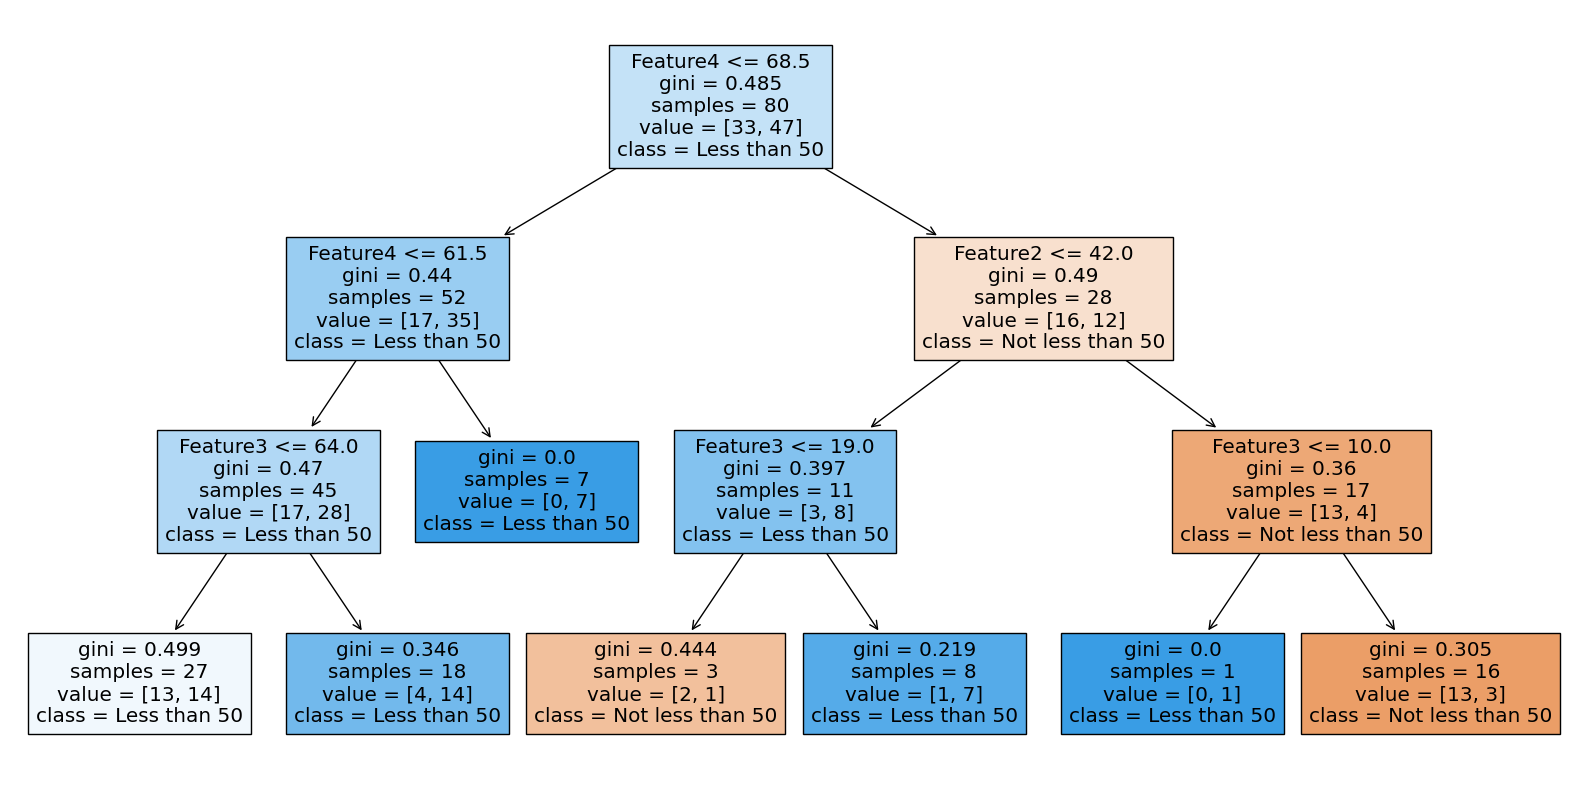

In [85]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_random, filled=True, feature_names=list(X_check.columns), class_names=['Not less than 50', 'Less than 50'])
plt.show()

The above accuracy (without using any pruning techniques) is 0.60. This is the original accuracy. Please see the figure above of the decision tree for the random dataset.

The first pruning method is maximum depth. This was very successful in decreasing the number of if-then clauses. The accuracy was 0.6500000000 which is somewhat close to the orignal accuracy of 0.60.

In [86]:
dt_random = DecisionTreeClassifier(max_depth=2, random_state=42)

In [87]:
dt_random.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [88]:
tree_to_code(dt_random, X_check.columns)

if Feature4 <= 68.50:
  if Feature4 <= 61.50:
    then predict 'Less than 50'
  else:  # if Feature4 > 61.50
    then predict 'Less than 50'
else:  # if Feature4 > 68.50
  if Feature2 <= 42.00:
    then predict 'Less than 50'
  else:  # if Feature2 > 42.00
    then predict 'Not Less than 50'


In [89]:
y_pred_simplified = dt_random.predict(X_test_check)

accuracy_simplified = accuracy_score(y_test_check, y_pred_simplified)

print(f"Accuracy of the simplified model: {accuracy_simplified:.10f}")

Accuracy of the simplified model: 0.6500000000


The second pruning method is maximum leaf nodes. This was not successful in decreasing the number of if-then clauses. The accuracy was 0.6500000000 which is somewhat close to the orignal accuracy of 0.60. 

In [90]:
dt_random = DecisionTreeClassifier(max_depth=3, random_state=42, max_leaf_nodes=8)

In [91]:
dt_random.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, random_state=42)

In [93]:
tree_to_code(dt_random, X_check.columns)

if Feature4 <= 68.50:
  if Feature4 <= 61.50:
    if Feature3 <= 64.00:
      then predict 'Less than 50'
    else:  # if Feature3 > 64.00
      then predict 'Less than 50'
  else:  # if Feature4 > 61.50
    then predict 'Less than 50'
else:  # if Feature4 > 68.50
  if Feature2 <= 42.00:
    if Feature1 <= 16.50:
      then predict 'Not Less than 50'
    else:  # if Feature1 > 16.50
      then predict 'Less than 50'
  else:  # if Feature2 > 42.00
    if Feature3 <= 10.00:
      then predict 'Less than 50'
    else:  # if Feature3 > 10.00
      then predict 'Not Less than 50'


In [94]:
y_pred_max_leaf = dt_random.predict(X_test_check)

accuracy_max_leaf = accuracy_score(y_test_check, y_pred_max_leaf)

print(f"Accuracy of the max_leaf_nodes pruned model: {accuracy_max_leaf:.10f}")

Accuracy of the max_leaf_nodes pruned model: 0.6500000000


The third pruning method is minimum samples leaf. This was very successful in decreasing the number of if-then clauses. The accuracy was 0.5500000000 which is somewhat close to the original accuracy of 0.60.

In [95]:
# Initialize and train the Decision Tree classifier with min_samples_split for pruning
dt_random = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_split=40)

In [96]:
dt_random.fit(X_train_check, y_train_check)

DecisionTreeClassifier(max_depth=3, min_samples_split=40, random_state=42)

In [97]:
tree_to_code(dt_random, X_check.columns)

if Feature4 <= 68.50:
  if Feature4 <= 61.50:
    if Feature3 <= 64.00:
      then predict 'Less than 50'
    else:  # if Feature3 > 64.00
      then predict 'Less than 50'
  else:  # if Feature4 > 61.50
    then predict 'Less than 50'
else:  # if Feature4 > 68.50
  then predict 'Not Less than 50'


In [98]:
y_pred_min_samples_split = dt_random.predict(X_test_check)

accuracy_min_samples_split = accuracy_score(y_test_check, y_pred_min_samples_split)

print(f"Accuracy of the min_samples_split pruned model: {accuracy_min_samples_split:.10f}")

Accuracy of the min_samples_split pruned model: 0.5500000000
